In [27]:
#! /usr/bin/env python

In [42]:
# import modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from keras.losses import mean_squared_error
from keras import metrics

In [43]:
# pull dataset
nutrition = pd.read_pickle("./Nutrition_Full_Features.pkl")

In [44]:
#drop rows with NaN
nutrition = nutrition.dropna()

In [45]:
#Data for features
X_original = nutrition.iloc[:, 11:]
y = nutrition.iloc[:, 7]
y = y.to_numpy()

In [46]:
# normalise the data by feature column
X = preprocessing.normalize(X_original, axis=0)
X = pd.DataFrame(X_original, columns = X_original.columns) # processing loses columns headers so these must be reestablished
X = X.to_numpy()

In [47]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [48]:
#building keras Neural Network model

from keras.layers import Dense, Activation
from keras.models import Sequential
from keras import losses

# model type
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(8, activation = 'relu', input_dim = 40))

# Adding the second hidden layer
model.add(Dense(units = 16, activation = 'relu'))

# Could create for loop to check number of layers

#avoids overfitting
#https://keras.io/api/layers/regularization_layers/dropout/
model.add(keras.layers.Dropout(0.1))


# Adding the output layer
model.add(Dense(units = 1))


# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae', 'R_Square']) #currently loss is the only thing we care about

# Training the Model
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_split=0.2, verbose = 0)

ValueError: in user code:

    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:758 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:387 update_state
        self.build(y_pred, y_true)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:317 build
        self._metrics = nest.map_structure_up_to(y_pred, self._get_metric_objects,
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1159 map_structure_up_to
        return map_structure_with_tuple_paths_up_to(
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1257 map_structure_with_tuple_paths_up_to
        results = [
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1258 <listcomp>
        func(*args, **kwargs) for args in zip(flat_path_gen, *flat_value_gen)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1161 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:418 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:418 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:437 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\metrics.py:3490 get
        return deserialize(str(identifier))
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\metrics.py:3446 deserialize
        return deserialize_keras_object(
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:377 deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: R_Square


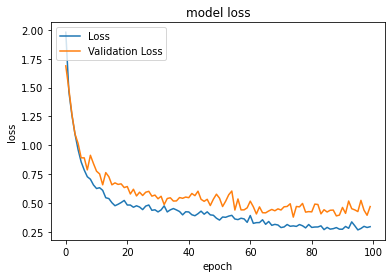

In [35]:
#plot learning curves


#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')
plt.show()


In [36]:
#model evaluation
score = model.evaluate(X_test, y_test, verbose = 0)[1]

ValueError: in user code:

    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1188 test_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:387 update_state
        self.build(y_pred, y_true)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:317 build
        self._metrics = nest.map_structure_up_to(y_pred, self._get_metric_objects,
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1159 map_structure_up_to
        return map_structure_with_tuple_paths_up_to(
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1257 map_structure_with_tuple_paths_up_to
        results = [
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1258 <listcomp>
        func(*args, **kwargs) for args in zip(flat_path_gen, *flat_value_gen)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1161 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:418 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:418 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:437 _get_metric_object
        metric_obj = metrics_mod.get(metric)
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\metrics.py:3490 get
        return deserialize(str(identifier))
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\metrics.py:3446 deserialize
        return deserialize_keras_object(
    C:\Users\kaela\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:377 deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: R_Square


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 328       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


In [38]:
print('MSE without tuning: {}'.format(score))

MSE without tuning: 0.0


In [39]:
# get predicted values
y_pred = model.predict(X_test)

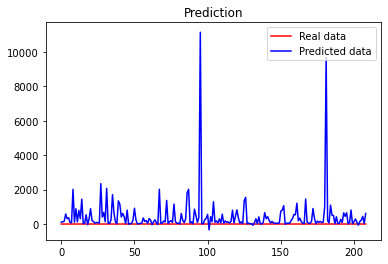

In [40]:
# plot predicted values against test values
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend(loc='upper right')
plt.show()

In [15]:
# checking the output metrics
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 14.009692672403721
Mean Squared Error: 965.0874205803491
Root Mean Squared Error: 31.065856186178888


In [16]:
y_mean = np.mean(y)
y_std = np.std(y)
print('Output Standard Deviation:', y_std)
print('Output Mean:', y_mean)

Output Standard Deviation: 1.6110865075846403
Output Mean: 0.8464732245681383


# Hyper Parameter Tuning Section

In [17]:
import kerastuner
from kerastuner import HyperModel

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=64, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid','softmax']),
        input_dim = 40
        )
             
    )

    model.add(Dense(
        units=hp.Int('units', min_value=8, max_value=64, step=4), 
        activation = hp.Choice('dense_activation', 
                values=['relu', 'tanh','sigmoid','softmax'])
        )
             
    )
    
    model.add(
        keras.layers.Dropout(
            hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    step=0.01)
        )
    )

    # Adding the output layer
    model.add(Dense(units = 1))


    model.compile(
        optimizer = hp.Choice('dense_optimizer',
                values=['adam','SGD','rmsprop','adadelta'] ),
        loss = 'mean_squared_error',
        metrics = ['mae', 'R_Square'],
    )
    return model

In [18]:
tuner = kerastuner.tuners.RandomSearch(
            build_model,
            objective='loss',
            max_trials=200,            # increase number of trials to increase chances of better model
            executions_per_trial=2,
            project_name='hp_values',
            overwrite=True)

In [19]:
tuner.search(X_train, y_train, epochs=50)

Trial 36 Complete [00h 00m 19s]
loss: 1.650420367717743

Best loss So Far: 0.4109190106391907
Total elapsed time: 00h 07m 43s

Search: Running Trial #37

Hyperparameter    |Value             |Best Value So Far 
units             |32                |64                
dense_activation  |sigmoid           |sigmoid           
dropout           |0                 |0.08              
dense_optimizer   |rmsprop           |rmsprop           

Epoch 1/50
27/27 [==============================] - 2s 4ms/step - loss: 2.2319 - accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 2.2703 - accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 5ms/step - loss: 2.1412 - accuracy: 8.3830e-04
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 1.8593 - accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 1.7826 - accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] 

KeyboardInterrupt: 

In [20]:
#collect best hyperparameters to rebuild model
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2624      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,849
Trainable params: 6,849
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Training the Model
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_split=0.2, verbose = 0)

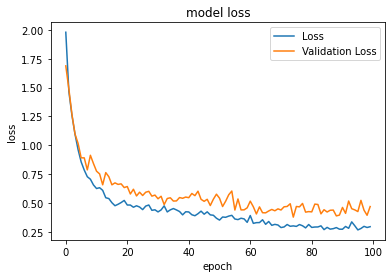

In [22]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [23]:
# get new predicted values with Hyperparameters
y_hp_pred = model.predict(X_test)

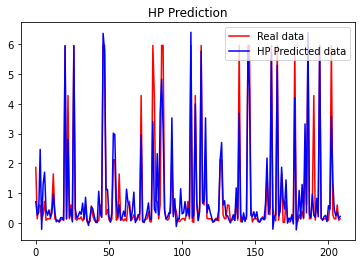

In [24]:
# plot predicted values against test values
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_hp_pred, color = 'blue', label = 'HP Predicted data')
plt.title('HP Prediction')
plt.legend(loc='upper right')
plt.show()

In [25]:
# checking the output metrics
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hp_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hp_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hp_pred)))

y_mean = np.mean(y_hp_pred)
y_std = np.std(y_hp_pred)
print('Output Standard Deviation:', y_std)
print('Output Mean:', y_mean)

Mean Absolute Error: 0.3892398992298608
Mean Squared Error: 0.532856122222772
Root Mean Squared Error: 0.729969946109271
Output Standard Deviation: 1.5213739
Output Mean: 0.948981


In [26]:
# serialize model to JSON
model_json = model.to_json()
with open("best_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("best_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#delete hp_values file for easy github committing
import shutil
shutil.rmtree('./hp_values')